In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualize

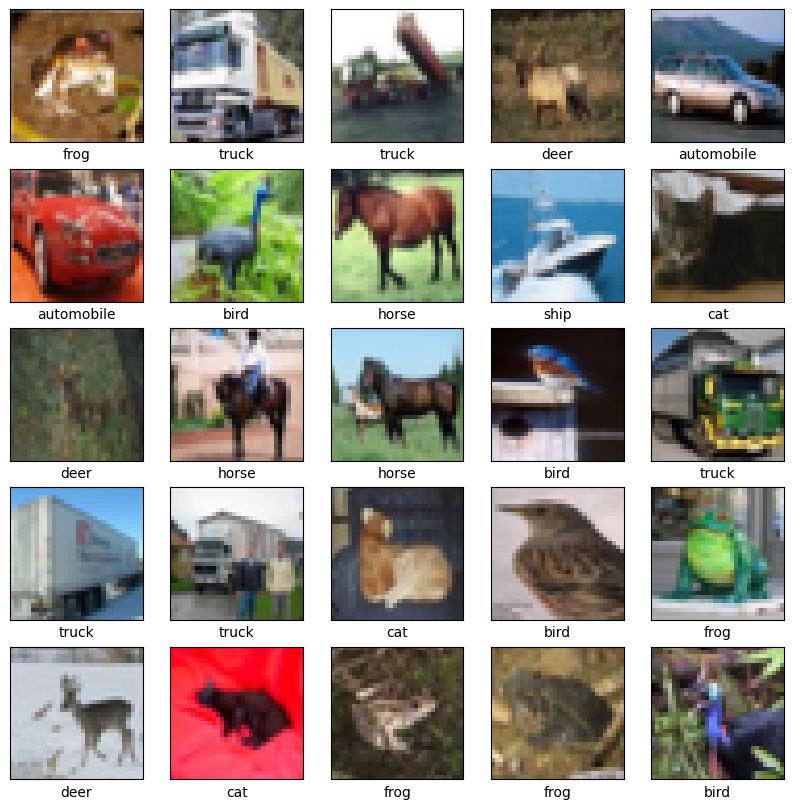

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Model

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten

model = models.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),  # Zwiększenie liczby neuronów
    Dropout(0.5),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                       loss=tf.keras.losses.sparse_categorical_crossentropy,
                       metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [6]:
# Tworzenie obiektów tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint
import datetime

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir='logs/model_improved/{}'.format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001),
    ModelCheckpoint(filepath='best_model', monitor='val_loss', save_best_only=True, mode='min', verbose=1, patience=5)]
# Trenowanie ulepszonego modelu
history = model.fit(train_dataset,
                   epochs=30,
                   validation_data=test_dataset,
                   callbacks=callbacks)

Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 1.7304 - accuracy: 0.3885
Epoch 1: val_loss improved from inf to 1.24228, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 41s 22ms/step - loss: 1.7304 - accuracy: 0.3885 - val_loss: 1.2423 - val_accuracy: 0.5468 - lr: 5.0000e-04
Epoch 2/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.1954 - accuracy: 0.5749
Epoch 2: val_loss improved from 1.24228 to 1.13547, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 1.1953 - accuracy: 0.5749 - val_loss: 1.1355 - val_accuracy: 0.5958 - lr: 5.0000e-04
Epoch 3/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.9897 - accuracy: 0.6574
Epoch 3: val_loss improved from 1.13547 to 0.91368, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.9897 - accuracy: 0.6574 - val_loss: 0.9137 - val_accuracy: 0.6859 - lr: 5.0000e-04
Epoch 4/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.8819 - accuracy: 0.6955
Epoch 4: val_loss improved from 0.91368 to 0.79577, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.8815 - accuracy: 0.6957 - val_loss: 0.7958 - val_accuracy: 0.7240 - lr: 5.0000e-04
Epoch 5/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.7912 - accuracy: 0.7292
Epoch 5: val_loss improved from 0.79577 to 0.66989, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.7912 - accuracy: 0.7291 - val_loss: 0.6699 - val_accuracy: 0.7722 - lr: 5.0000e-04
Epoch 6/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.7034 - accuracy: 0.7603
Epoch 6: val_loss improved from 0.66989 to 0.64889, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.7035 - accuracy: 0.7603 - val_loss: 0.6489 - val_accuracy: 0.7738 - lr: 5.0000e-04
Epoch 7/30
1563/1563 [==============================] - ETA: 0s - loss: 0.6463 - accuracy: 0.7800
Epoch 7: val_loss improved from 0.64889 to 0.59254, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 34s 22ms/step - loss: 0.6463 - accuracy: 0.7800 - val_loss: 0.5925 - val_accuracy: 0.7980 - lr: 5.0000e-04
Epoch 8/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.5853 - accuracy: 0.8012
Epoch 8: val_loss improved from 0.59254 to 0.55026, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 34s 21ms/step - loss: 0.5851 - accuracy: 0.8012 - val_loss: 0.5503 - val_accuracy: 0.8120 - lr: 5.0000e-04
Epoch 9/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.8117
Epoch 9: val_loss improved from 0.55026 to 0.51146, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 34s 21ms/step - loss: 0.5537 - accuracy: 0.8117 - val_loss: 0.5115 - val_accuracy: 0.8301 - lr: 5.0000e-04
Epoch 10/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.8276
Epoch 10: val_loss improved from 0.51146 to 0.48904, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.5093 - accuracy: 0.8276 - val_loss: 0.4890 - val_accuracy: 0.8354 - lr: 5.0000e-04
Epoch 11/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.4638 - accuracy: 0.8445
Epoch 11: val_loss did not improve from 0.48904
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4641 - accuracy: 0.8444 - val_loss: 0.5321 - val_accuracy: 0.8214 - lr: 5.0000e-04
Epoch 12/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.8531
Epoch 12: val_loss improved from 0.48904 to 0.47455, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.4382 - accuracy: 0.8531 - val_loss: 0.4746 - val_accuracy: 0.8446 - lr: 5.0000e-04
Epoch 13/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8611
Epoch 13: val_loss improved from 0.47455 to 0.46618, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.4123 - accuracy: 0.8612 - val_loss: 0.4662 - val_accuracy: 0.8512 - lr: 5.0000e-04
Epoch 14/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.8684
Epoch 14: val_loss did not improve from 0.46618
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3897 - accuracy: 0.8684 - val_loss: 0.6549 - val_accuracy: 0.7841 - lr: 5.0000e-04
Epoch 15/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.3636 - accuracy: 0.8777
Epoch 15: val_loss did not improve from 0.46618
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3639 - accuracy: 0.8776 - val_loss: 0.5004 - val_accuracy: 0.8382 - lr: 5.0000e-04
Epoch 16/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.9084
Epoch 16: val_loss improved from 0.46618 to 0.41181, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.2731 - accuracy: 0.9085 - val_loss: 0.4118 - val_accuracy: 0.8755 - lr: 1.0000e-04
Epoch 17/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.2362 - accuracy: 0.9190
Epoch 17: val_loss improved from 0.41181 to 0.40679, saving model to best_model


INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.2362 - accuracy: 0.9190 - val_loss: 0.4068 - val_accuracy: 0.8769 - lr: 1.0000e-04
Epoch 18/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.9241
Epoch 18: val_loss did not improve from 0.40679
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2214 - accuracy: 0.9240 - val_loss: 0.4080 - val_accuracy: 0.8759 - lr: 1.0000e-04
Epoch 19/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.2058 - accuracy: 0.9293
Epoch 19: val_loss did not improve from 0.40679
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2057 - accuracy: 0.9293 - val_loss: 0.4126 - val_accuracy: 0.8797 - lr: 1.0000e-04
Epoch 20/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9333
Epoch 20: val_loss did not improve from 0.40679
1563/1563 [==============================] - 30s 19ms/step - loss: 0.1959 - accuracy: 0.9333 - val_loss

In [8]:
def plot_history_and_evaluate(model, history, dataset):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    test_loss, test_acc = model.evaluate(dataset, verbose=2)
    print(f"Test loss: {test_loss}")
    print(f"Test accuracy: {test_acc}")

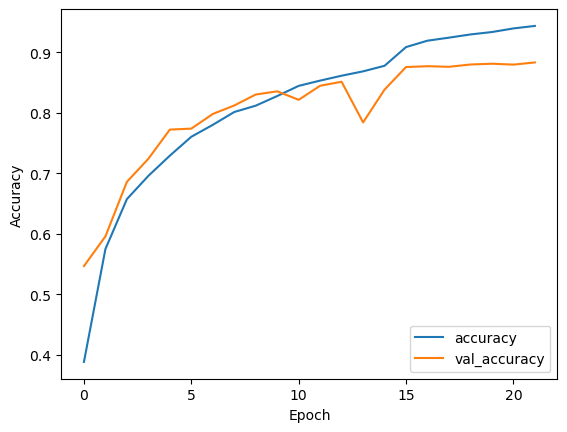

313/313 - 2s - loss: 0.4068 - accuracy: 0.8769 - 2s/epoch - 6ms/step
Test loss: 0.4067867398262024
Test accuracy: 0.8769000172615051


In [9]:
plot_history_and_evaluate(model, history, test_dataset)

In [10]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model')

In [11]:
# Przykładowe dane testowe: test_images, test_labels
test_loss, test_acc = best_model.evaluate(test_dataset, verbose=2)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.4068 - accuracy: 0.8769 - 2s/epoch - 7ms/step
Test loss: 0.4067867398262024, Test accuracy: 0.8769000172615051


### Confussion matrix

313/313 [==============================] - 2s 6ms/step


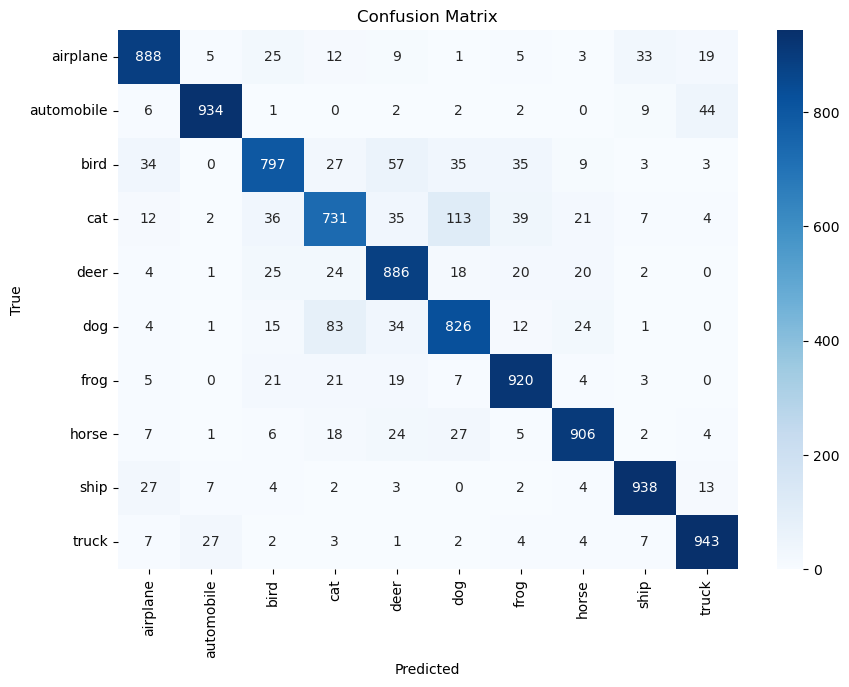

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Używamy metody predict do przewidzenia etykiet
predictions = best_model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Obliczenie macierzy pomyłek
cm = confusion_matrix(true_labels, predicted_labels)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### ROC curve

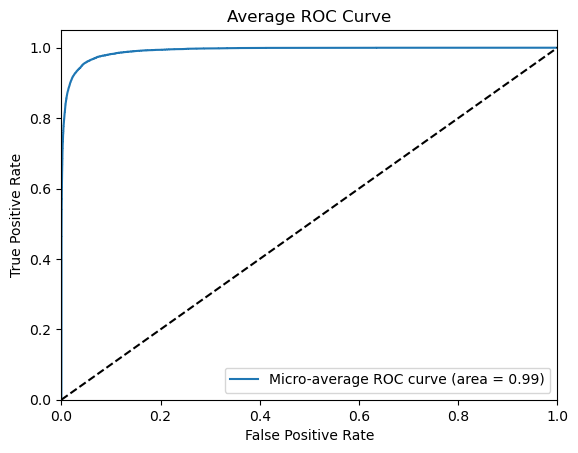

In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Zakoduj etykiety binarnie
n_classes = len(class_names)
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# Oblicz mikro-średnią ROC curve i ROC AUC
fpr, tpr, _ = roc_curve(true_labels_bin.ravel(), predictions.ravel())
roc_auc = auc(fpr, tpr)

# Rysowanie uśrednionej krzywej ROC
plt.figure()
plt.plot(fpr, tpr, label=f'Micro-average ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall curve

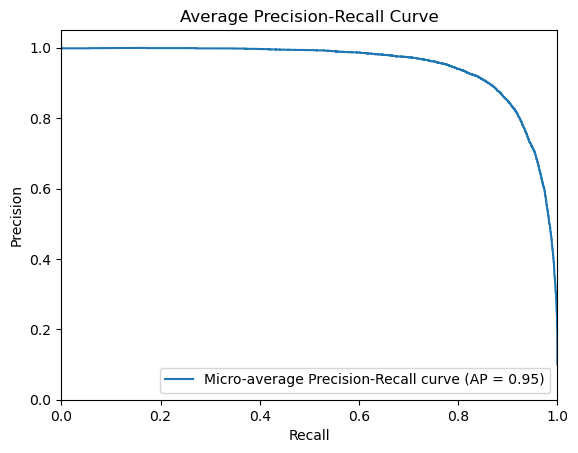

In [14]:
# Oblicz mikro-średnią Precision-Recall curve i AUC
precision, recall, _ = precision_recall_curve(true_labels_bin.ravel(), predictions.ravel())
average_precision = average_precision_score(true_labels_bin, predictions, average="micro")

# Rysowanie uśrednionej krzywej Precision-Recall
plt.figure()
plt.step(recall, precision, where='post', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
for i, accuracy in enumerate(class_accuracies):
    print(f"Accuracy for class {class_names[i]}: {accuracy:.2f}")

Accuracy for class airplane: 0.89
Accuracy for class automobile: 0.93
Accuracy for class bird: 0.80
Accuracy for class cat: 0.73
Accuracy for class deer: 0.89
Accuracy for class dog: 0.83
Accuracy for class frog: 0.92
Accuracy for class horse: 0.91
Accuracy for class ship: 0.94
Accuracy for class truck: 0.94


In [20]:
sensitivity = np.diag(cm) / np.sum(cm, axis=1)  # True Positive Rate
specificity = (np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)) / (np.sum(cm) - np.sum(cm, axis=1))  # True Negative Rate

In [25]:
for i, class_name in enumerate(class_names):
    print(f"Klasa: {class_name} - Sensitivity: {sensitivity[i]:.2f} - Specificity: {specificity[i]:.2f}")

Klasa: airplane - Sensitivity: 0.89 - Specificity: 0.99
Klasa: automobile - Sensitivity: 0.93 - Specificity: 1.00
Klasa: bird - Sensitivity: 0.80 - Specificity: 0.98
Klasa: cat - Sensitivity: 0.73 - Specificity: 0.98
Klasa: deer - Sensitivity: 0.89 - Specificity: 0.98
Klasa: dog - Sensitivity: 0.83 - Specificity: 0.98
Klasa: frog - Sensitivity: 0.92 - Specificity: 0.99
Klasa: horse - Sensitivity: 0.91 - Specificity: 0.99
Klasa: ship - Sensitivity: 0.94 - Specificity: 0.99
Klasa: truck - Sensitivity: 0.94 - Specificity: 0.99
